In [70]:
import pandas as pd

loan_data = pd.read_csv("/content/drive/MyDrive/idx partners/loan_data_2007_2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [73]:
loan_data['loan_status'] = loan_data['loan_status'].replace(['Fully Paid', 'Charged Off'], [1, 0])
loan_data = loan_data[(loan_data.loan_status == 1) | (loan_data.loan_status == 0)]

In [74]:
print(loan_data['loan_status'].value_counts())
print("NaN =", loan_data['loan_status'].isna().sum())

# Fully paid -> 1
# Charged Off -> 0

1    184739
0     42475
Name: loan_status, dtype: int64
NaN = 0


In [75]:
# dropping unnecessary features
drop_unn = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'sub_grade', 'emp_title',
            'addr_state', 'last_credit_pull_d', 'earliest_cr_line']
loan_data = loan_data.drop(drop_unn, axis=1)

# dropping features that leaks information or data from the future
drop_leak = ['funded_amnt', 'funded_amnt_inv', 'issue_d', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
             'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
             'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']
loan_data = loan_data.drop(drop_leak, axis=1)

In [76]:
loan_data = loan_data.dropna(thresh=(len(loan_data) * 0.7), axis=1)

In [77]:
print(loan_data.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')


In [78]:
# number of missing value in each column
print(loan_data.isna().sum())

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                     8673
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      186
total_acc                         0
initial_list_status               0
collections_12_mths_ex_med       56
policy_code                       0
application_type                  0
acc_now_delinq                    0
tot_coll_amt                  63708
tot_cur_bal                   63708
total_rev_hi_lim            

In [79]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   227214 non-null  int64  
 1   term                        227214 non-null  object 
 2   int_rate                    227214 non-null  float64
 3   installment                 227214 non-null  float64
 4   grade                       227214 non-null  object 
 5   emp_length                  218541 non-null  object 
 6   home_ownership              227214 non-null  object 
 7   annual_inc                  227214 non-null  float64
 8   verification_status         227214 non-null  object 
 9   loan_status                 227214 non-null  object 
 10  pymnt_plan                  227214 non-null  object 
 11  purpose                     227214 non-null  object 
 12  dti                         227214 non-null  float64
 13  delinq_2yrs   

In [80]:
# filling the missing values

loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0])
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mean())
loan_data['collections_12_mths_ex_med'] = loan_data['collections_12_mths_ex_med'].fillna(loan_data['collections_12_mths_ex_med'].mean())
loan_data['tot_coll_amt'] = loan_data['tot_coll_amt'].fillna(loan_data['tot_coll_amt'].mean())
loan_data['tot_cur_bal'] = loan_data['tot_cur_bal'].fillna(loan_data['tot_cur_bal'].mean())
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(loan_data['total_rev_hi_lim'].mean())

In [81]:
# dropping policy_code and application_type because only have 1 value
loan_data = loan_data.drop(['policy_code', 'application_type'], axis=1)

In [82]:
from sklearn.preprocessing import OrdinalEncoder

# encoding the categorical columns
categorical_col = ['term', 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']

loan_data['emp_length'] = loan_data['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 
                                                           '8 years', '9 years', '10+ years'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

encoder = OrdinalEncoder()
loan_data[categorical_col] = encoder.fit_transform(loan_data[categorical_col])

loan_data.shape

(227214, 26)

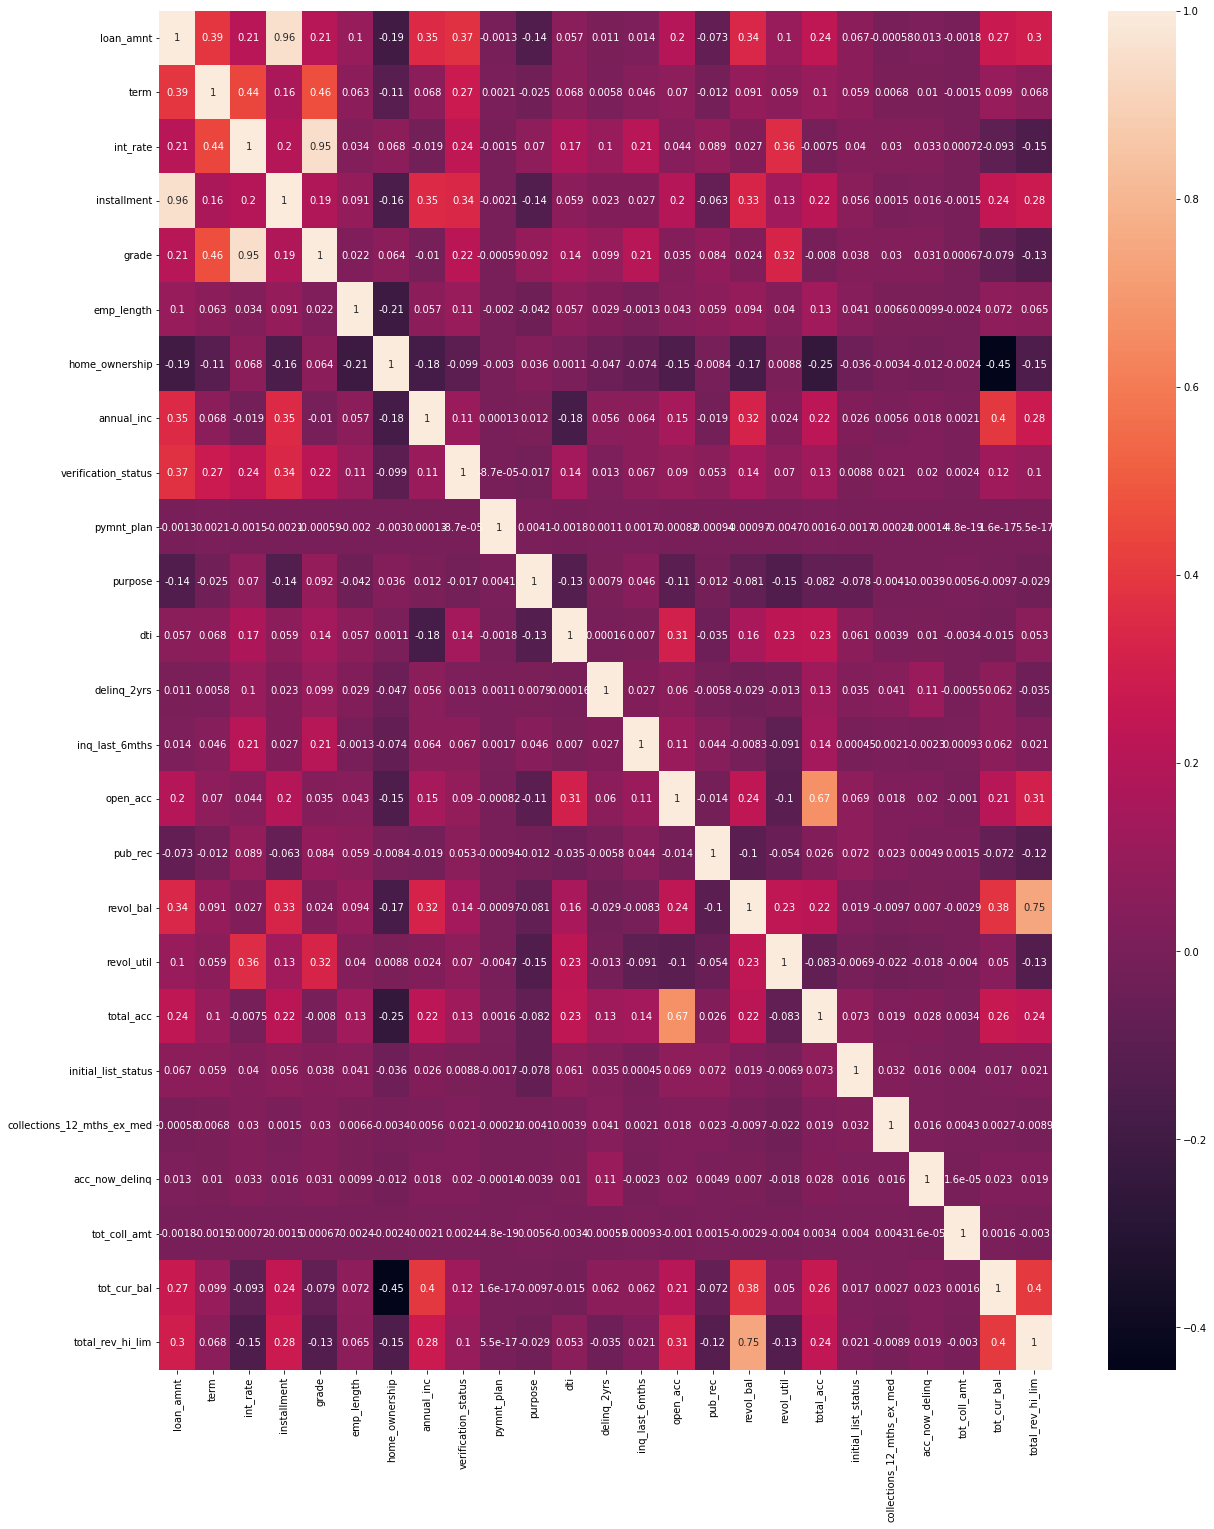

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20,25))
sns.heatmap(loan_data.corr(),annot=True)

In [85]:
# dropping the high correlated features
loan_data = loan_data.drop(['loan_amnt', 'int_rate'], axis=1)

In [86]:
from sklearn.preprocessing import StandardScaler

# Scaling
sc=StandardScaler()
numerical_col = ['installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
col_to_scale = ['installment', 'annual_inc', 'dti', 'revol_bal', 
                'revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
features = loan_data[numerical_col]
scaled_features = sc.fit_transform(features)
loan_data[numerical_col] = scaled_features


In [87]:
x = loan_data.drop(columns = ['loan_status'])
y = loan_data['loan_status'].astype(int)

# print(x.head())
# print(y.head())

In [88]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [89]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.metrics import accuracy_score, auc, roc_auc_score,roc_curve,classification_report, confusion_matrix,f1_score 
from sklearn.metrics import precision_score,recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(max_iter=1000)
LRmodel.fit(X_train, y_train)

XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)

RFmodel = RandomForestClassifier()
RFmodel.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [91]:
ypred_lr=LRmodel.predict(X_test)
print ('Training accuracy:',LRmodel.score(X_train,y_train))
print ('Testing accuracy :',LRmodel.score(X_test,y_test))

Training accuracy: 0.8138313479255912
Testing accuracy : 0.8115922894111434


AUC-ROC Score :  0.6989721095888073


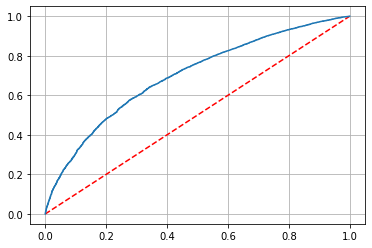

In [92]:
ypred_full=LRmodel.predict_proba(X_test)[:,1]
print('AUC-ROC Score : ', roc_auc_score(y_test,ypred_full))
fpr,tpr,thresholds = roc_curve(y_test,ypred_full)
auc = roc_auc_score(y_test,ypred_full)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

result_table = result_table.append({'classifiers':'LogisticReression',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

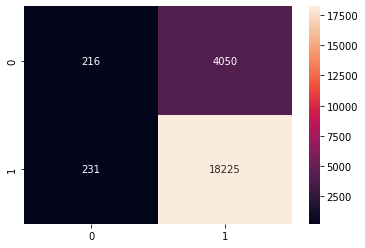

In [93]:
# Confusion matrix
cm = confusion_matrix(y_test, ypred_lr)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [94]:
# classification report for Logistic Regression model
print('Classification Report :')
print(classification_report(y_test,ypred_lr))

Classification Report :
              precision    recall  f1-score   support

           0       0.48      0.05      0.09      4266
           1       0.82      0.99      0.89     18456

    accuracy                           0.81     22722
   macro avg       0.65      0.52      0.49     22722
weighted avg       0.76      0.81      0.74     22722



In [95]:
ypred_xgb=XGBmodel.predict(X_test)
print ('Training accuracy:',XGBmodel.score(X_train,y_train))
print ('Testing accuracy :',XGBmodel.score(X_test,y_test))

Training accuracy: 0.8152005946442893
Testing accuracy : 0.8123844731977818


AUC-ROC Score :  0.7060071383268396


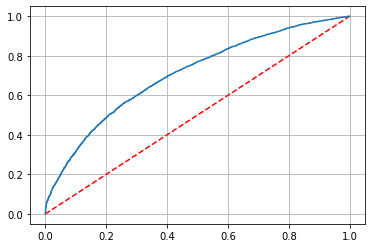

In [96]:
ypred_full=XGBmodel.predict_proba(X_test)[:,1]
print('AUC-ROC Score : ',roc_auc_score(y_test,ypred_full))
fpr,tpr,thresholds = roc_curve(y_test,ypred_full)
auc = roc_auc_score(y_test,ypred_full)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

result_table = result_table.append({'classifiers':'XGBClassifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

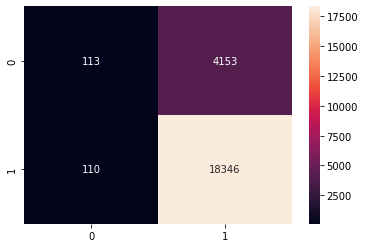

In [97]:
# Confusion matrix
cm = confusion_matrix(y_test, ypred_xgb)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [98]:
# classification report for XGB Classifier model

print('Classification Report :')
print(classification_report(y_test,ypred_xgb))

Classification Report :
              precision    recall  f1-score   support

           0       0.51      0.03      0.05      4266
           1       0.82      0.99      0.90     18456

    accuracy                           0.81     22722
   macro avg       0.66      0.51      0.47     22722
weighted avg       0.76      0.81      0.74     22722



In [99]:
ypred_rf=RFmodel.predict(X_test)
print ('Training accuracy:',RFmodel.score(X_train,y_train))
print ('Testing accuracy :',RFmodel.score(X_test,y_test))

Training accuracy: 0.9999755491657375
Testing accuracy : 0.8118123404629874


AUC-ROC Score :  0.6970079532806552


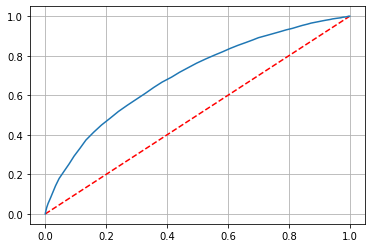

In [100]:
ypred_full=RFmodel.predict_proba(X_test)[:,1]
print('AUC-ROC Score : ',roc_auc_score(y_test,ypred_full))
fpr,tpr,thresholds = roc_curve(y_test,ypred_full)
auc = roc_auc_score(y_test,ypred_full)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

result_table = result_table.append({'classifiers':'RandomForestClassifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

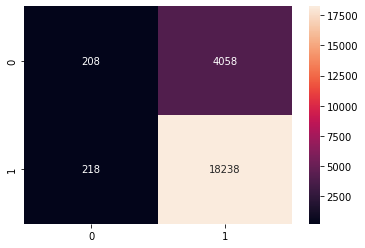

In [101]:
# Confusion matrix
cm = confusion_matrix(y_test, ypred_rf)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [102]:
# classification report for Random Forest model

print('Classification Report :')
print(classification_report(y_test,ypred_rf))

Classification Report :
              precision    recall  f1-score   support

           0       0.49      0.05      0.09      4266
           1       0.82      0.99      0.90     18456

    accuracy                           0.81     22722
   macro avg       0.65      0.52      0.49     22722
weighted avg       0.76      0.81      0.74     22722



In [103]:
result_table.set_index('classifiers', inplace=True)

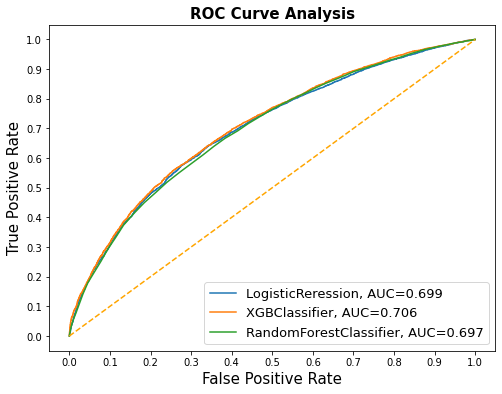

In [104]:
import numpy as np

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()